In [6]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import StackingClassifier

import utils

warnings.filterwarnings('ignore')


In [14]:
data_file = pd.read_excel('data/Sept/IDOLOGY_Qualifiers_total.xlsx')
data_file.drop('QUALIFIERS_NEW=Empty', axis=1, inplace=True)
print(data_file.shape)
samplings = [5, 6, 7, 8]
img_dir = '/home/cognam/Pictures/Ideology_conf/'

(16458, 70)


In [15]:
data_train, data_test = train_test_split(data_file, test_size=0.3, random_state=45)

In [16]:
def train_model(data_train, data_test, clfr, hyper_param, img_prefix):
    for sampling in samplings:
        x_train, y_train = utils.preprocessunEqualDistribution(data_train, sampling)

        print(f' Classifier = {img_prefix} Sampling = {sampling}')

        clf = GridSearchCV(clfr, hyper_param, cv=5, scoring='recall_macro')
        clf.fit(x_train, y_train)
        print(clf.best_params_)
        
        
        x_test = data_test.drop('Label', axis=1)
        y_test = data_test['Label']
        
        y_pred = clf.predict(x_test)

        conf = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf, annot=True, cmap="Greens", fmt='g', cbar_kws={'label': f'{img_prefix} sampling = {sampling}'}
                   , xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
        file_name = img_dir + img_prefix + '_' + str(sampling) + '.png'
#         plt.savefig(file_name, dpi=600)
        plt.show()

 Classifier = RandomForestPCA Sampling = 5
{'pca__n_components': 10}


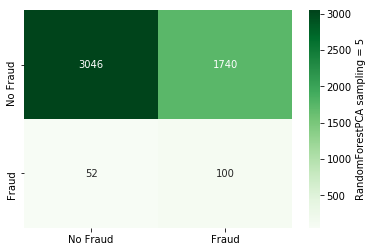

 Classifier = RandomForestPCA Sampling = 6
{'pca__n_components': 24}


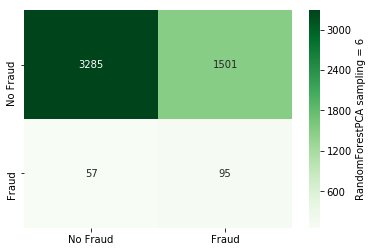

 Classifier = RandomForestPCA Sampling = 7
{'pca__n_components': 26}


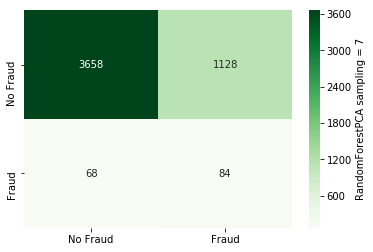

 Classifier = RandomForestPCA Sampling = 8
{'pca__n_components': 18}


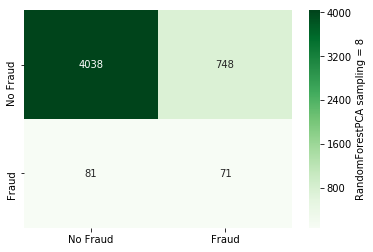

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, SparsePCA
from sklearn.linear_model import LogisticRegression

clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier()
# clf4 = SVC(C=10,kernel='rbf',max_iter=1000)
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3,clf4],meta_classifier=DecisionTreeClassifier(), use_probas=False,average_probas=False)

pipe = Pipeline(steps=
                [('pca', PCA()),
                 ('sclf', sclf)])

data_train, data_test = train_test_split(data_file, test_size=0.3, random_state=45)

rf_param = [{ 'pca__n_components': [10, 12, 14, 16, 18, 20, 22, 24, 26]}]
train_model(data_train, data_test, pipe, rf_param, 'RandomForestPCA')

 Classifier = Begging_Best Sampling = 5
{'pca__n_components': 20}


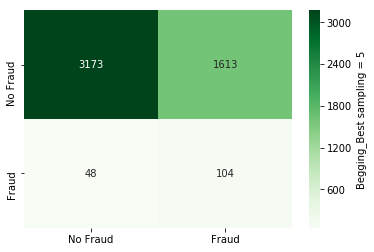

 Classifier = Begging_Best Sampling = 6
{'pca__n_components': 14}


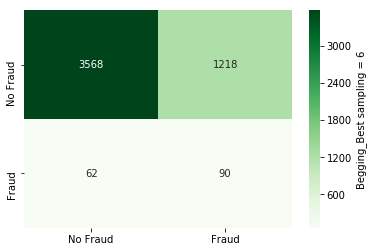

 Classifier = Begging_Best Sampling = 7
{'pca__n_components': 16}


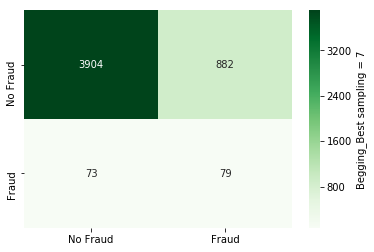

 Classifier = Begging_Best Sampling = 8
{'pca__n_components': 10}


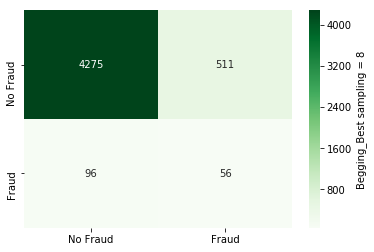

In [21]:
bagging_best = BaggingClassifier(base_estimator= DecisionTreeClassifier())
# bagging_best.fit(X_train,y_train.values.ravel())

pipe = Pipeline(steps=
                [('pca', PCA()),
                 ('bg_c', bagging_best)])


rf_param = [{ 'pca__n_components': [10, 12, 14, 16, 18, 20, 22, 24, 26]}]
train_model(data_train, data_test, pipe, rf_param, 'Begging_DT')

 Classifier = Begging_SVC Sampling = 5
{'pca__n_components': 24}


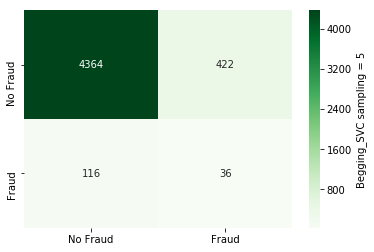

 Classifier = Begging_SVC Sampling = 6
{'pca__n_components': 24}


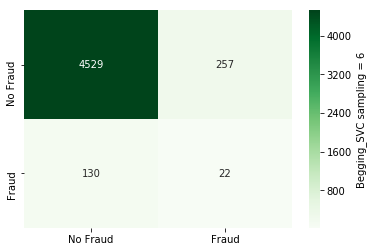

 Classifier = Begging_SVC Sampling = 7
{'pca__n_components': 24}


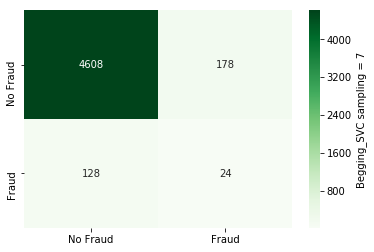

 Classifier = Begging_SVC Sampling = 8
{'pca__n_components': 24}


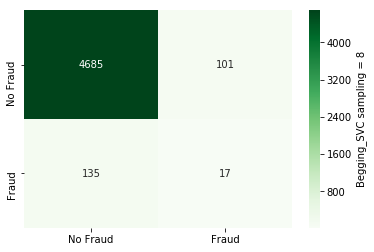

In [22]:
from sklearn.svm import SVC

bagging_best = BaggingClassifier(base_estimator= SVC())
# bagging_best.fit(X_train,y_train.values.ravel())

pipe = Pipeline(steps=
                [('pca', PCA()),
                 ('bg_c', bagging_best)])


rf_param = [{ 'pca__n_components': [10, 12, 14, 16, 18, 20, 22, 24, 26]}]
train_model(data_train, data_test, pipe, rf_param, 'Begging_SVC')

In [23]:
data_file_1 = pd.read_excel('data/Sept/IDOLOGY_Qualifiers.xlsx')
data_file_1.drop('QUALIFIERS_NEW=Empty', axis=1, inplace=True)
print(data_file.shape)

(16458, 70)


sampling = 5


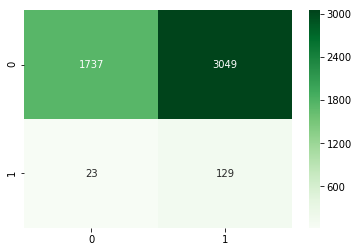

sampling = 6


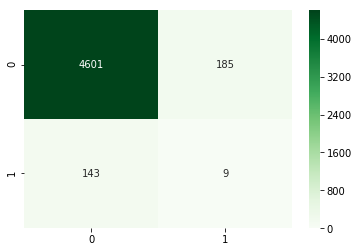

sampling = 7


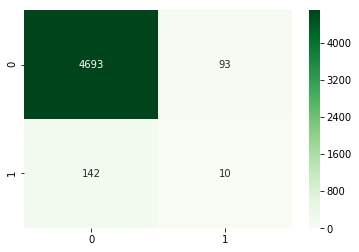

sampling = 8


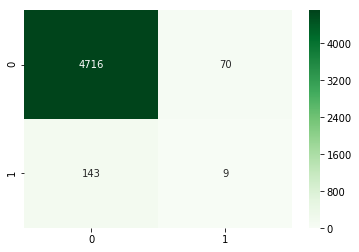

In [33]:
data_train, data_test = train_test_split(data_file_1, test_size=0.3, random_state=45)

for sampling in samplings:
    x_train, y_train = utils.preprocessunEqualDistribution(data_train, sampling)

    x_test = data_test.drop('Label', axis=1)
    y_test = data_test['Label']

    bagging_best = BaggingClassifier(base_estimator= DecisionTreeClassifier())
    bagging_best.fit(x_train,y_train.values.ravel())
    
    y_pred = bagging_best.predict(x_test)

    conf = confusion_matrix(y_test, y_pred)
    print(f'sampling = {sampling}')
    sns.heatmap(conf, annot=True, cmap="Greens", fmt='g')
#     file_name = img_dir + img_prefix + '_' + str(sampling) + '.png'
#         plt.savefig(file_name, dpi=600)
    plt.show()

In [ ]:




bagging_best = BaggingClassifier(base_estimator= DT())
bagging_best.fit(X_train,y_train.values.ravel())